In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm
print("packages imported successfully")

packages imported successfully


In [5]:
advertising = pd.read_csv(r"C:\Users\lenovo\Downloads\advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
advertising.shape

(200, 4)

In [7]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


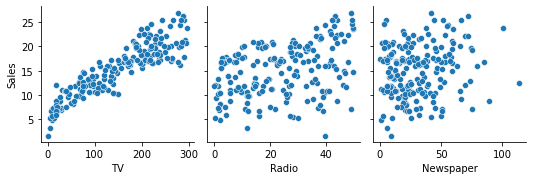

In [9]:
sns.pairplot(data = advertising, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales')

# Using statsmodel method

In [10]:
X = advertising['TV']
y = advertising['Sales']

<AxesSubplot:>

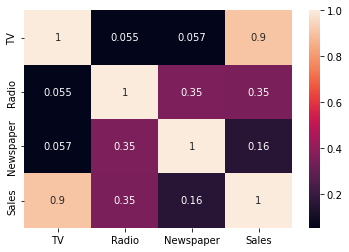

In [11]:
sns.heatmap(advertising.corr(), annot = True)

In [21]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [29]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [30]:
#Train the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [33]:
#Fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [35]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [37]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.52e-52
Time:                        01:50:20   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

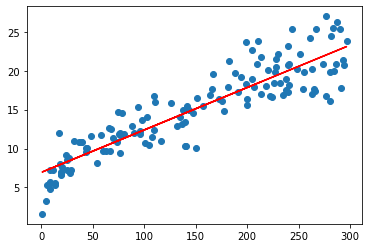

In [40]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9487+(0.0545*X_train),'r')
plt.show()

### Residual Analysis

In [41]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred.head()

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
dtype: float64

In [42]:
#Calculate residuals
residual = y_train - y_train_pred

Text(0.5, 1.0, 'Residual Plot')

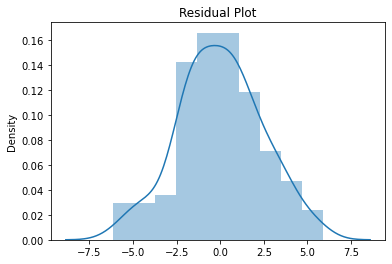

In [43]:
#Plot the residuals
plt.figure()
sns.distplot(residual)
plt.title("Residual Plot")

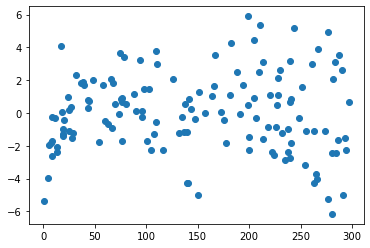

In [44]:
#Look for patterns in residuals (we should not be able to identify any solid patterns)
plt.scatter(X_train, residual)
plt.show()

### Prediction on test dataset

In [ ]:
#Make predictions on test set (y_test_pred)
#Evaluate the model

In [45]:
#Add constant to test set
X_test_sm = sm.add_constant(X_test)

#Make prediction
y_test_pred = lr_model.predict(X_test_sm)

In [46]:
#Evaluate model
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2
#Value of r2 on test set is 79% & on train set it is 81% --> Looks like a good model

0.7921031601245657

In [47]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826959

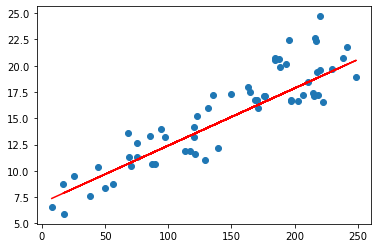

In [48]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9487+(0.0545*X_test),'r')
plt.show()

# sklearn Method

In [22]:
X_train_lm = X_train.values.reshape(-1, 1)
X_test_lm = X_test.values.reshape(-1, 1)

In [23]:
#steps in sklearn model
#Create an abject of linear regression
lm = LinearRegression()

#Fit the model
lm.fit(X_train_lm, y_train)

LinearRegression()

In [24]:
#See the params
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.94868320000136


In [25]:
#make predictions (train, test)
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [26]:
#Evaluate the model
print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.8157933136480388
0.792103160124566
